In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:

df = pd.read_csv('dataset1.csv')

In [ ]:
df.head()

,data,responsável,temperatura
0,sábado - 01/04/2023 00:00,Fábio,19.59
1,sábado - 01/04/2023 00:15,Fábio,19.10
2,sábado - 01/04/2023 00:30,Fábio,19.14
3,sábado - 01/04/2023 00:45,Fábio,18.55
4,sábado - 01/04/2023 01:00,Fábio,NaN


In [ ]:
df[['Dia', 'Data']] = df['data'].str.split('-', expand=True)

In [ ]:
df.head(2)

,data,responsável,temperatura,Dia,Data
0,sábado - 01/04/2023 00:00,Fábio,19.59,sábado,01/04/2023 00:00
1,sábado - 01/04/2023 00:15,Fábio,19.10,sábado,01/04/2023 00:15


In [ ]:
df['Data'] = pd.to_datetime(df['Data'], format=' %d/%m/%Y %H:%M')

In [ ]:
df.drop('data', axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   responsável  2880 non-null   object        
 1   temperatura  2799 non-null   float64       
 2   Dia          2880 non-null   object        
 3   Data         2880 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 90.1+ KB


<Axes: xlabel='Data'>

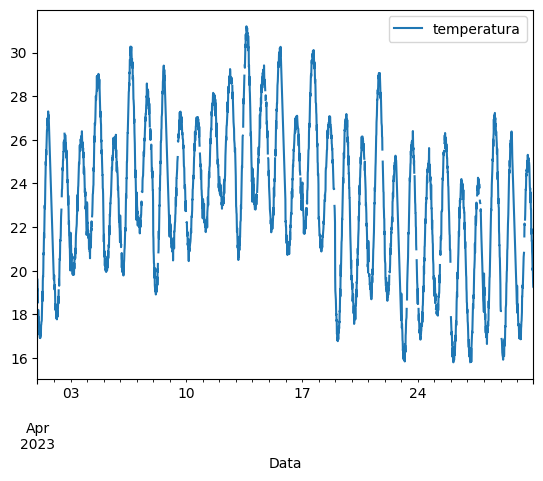

In [ ]:
df.plot(x='Data', y='temperatura', kind='line')

A partir do gráfico, percebemos que há uma oscilação da temperatura em um mesmo dia. Além disso, notamos que houve aumento da temperatura até aproximadamente o dia 15 e depois disso, a temperatura média dos dias começaram a cair, apesar de todas as datas estarem contidas no período de outono.Também vemos que há dados faltantes.

In [ ]:
px.scatter(df, x='Data', y='temperatura', color='responsável')


## Podemos perceber que os dados de fernando se tratam de uma regressão linear, na qual,das 15:30 às 23:45, a temperatura diminui 0.25 graus a cada 15 minutos

In [ ]:
df.describe()

,temperatura
count,2799.000000
mean,23.206384
std,3.397481
min,15.800000
25%,20.880000
50%,23.330000
75%,25.780000
max,31.200000


In [ ]:
df['temperatura'] = df['temperatura'].interpolate(method='index')

<Axes: xlabel='Data'>

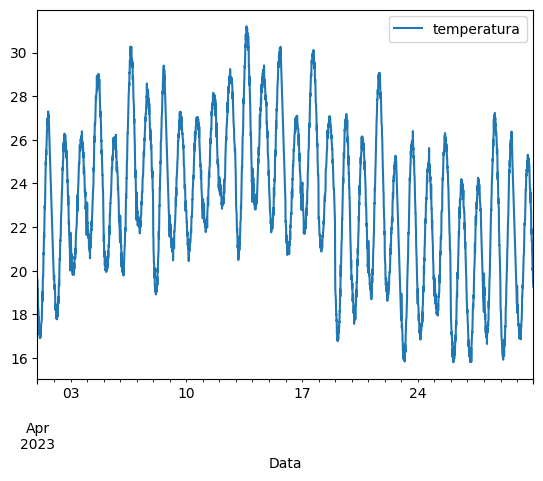

In [ ]:
df.plot(x='Data', y='temperatura', kind='line')

In [ ]:
df_quartas_feiras = df[df['Data'].dt.dayofweek == 2]

quarta_feira_mais_fria = df_quartas_feiras[df_quartas_feiras['temperatura'] == df_quartas_feiras['temperatura'].min()]

print(quarta_feira_mais_fria)

     responsável  temperatura      Dia                Data
2414       Fábio         15.8  quarta  2023-04-26 03:30:00


In [ ]:
df.set_index('Data', inplace=True)

temperaturas_por_dia = df.groupby(pd.Grouper(freq='D')).agg({'temperatura': ['max', 'min']})

temperaturas_por_dia.reset_index(inplace=True)



In [ ]:
temperaturas_por_dia.columns

Index(['Data', 'temperatura', 'temperatura'], dtype='object')

In [ ]:
temperaturas_por_dia.head()

,Data,max,min
0,2023-04-01,27.30,16.91
1,2023-04-02,26.28,17.77
2,2023-04-03,26.39,19.81
3,2023-04-04,29.02,20.57
4,2023-04-05,26.23,19.94


In [ ]:
media_temp_max = temperaturas_por_dia['max'].mean()
media_temp_min = temperaturas_por_dia['min'].mean()

maior_temp = temperaturas_por_dia['max'].max()
menor_temp = temperaturas_por_dia['max'].min()
maior_temp2 = temperaturas_por_dia['min'].max()
menor_temp2 = temperaturas_por_dia['min'].min()

fig = px.line(temperaturas_por_dia, x='Data', y=['max', 'min'], labels={'value': 'Temperatura (°C)'}, title='Temperatura Máxima e Mínima',color_discrete_map={'max': 'red', 'min': 'blue'}, line_shape='spline')

fig.add_annotation(text=f'Maior Temp: {maior_temp:.2f}', x=temperaturas_por_dia.loc[temperaturas_por_dia['max'].idxmax(), 'Data'], y=maior_temp, showarrow=True)
fig.add_annotation(text=f'Menor Temp: {menor_temp:.2f}', x=temperaturas_por_dia.loc[temperaturas_por_dia['max'].idxmin(), 'Data'], y=menor_temp, showarrow=True)

fig.add_annotation(text=f'Maior Temp: {maior_temp2:.2f}', x=temperaturas_por_dia.loc[temperaturas_por_dia['min'].idxmax(), 'Data'], y=maior_temp2, showarrow=True)
fig.add_annotation(text=f'Menor Temp: {menor_temp2:.2f}', x=temperaturas_por_dia.loc[temperaturas_por_dia['min'].idxmin(), 'Data'], y=menor_temp2, showarrow=True)

fig.add_shape(type='line', x0=temperaturas_por_dia['Data'].iloc[0], y0=media_temp_max, x1=temperaturas_por_dia['Data'].iloc[-1], y1=media_temp_max,
              line=dict(color='red', dash='dash'))

fig.add_shape(type='line', x0=temperaturas_por_dia['Data'].iloc[0], y0=media_temp_min, x1=temperaturas_por_dia['Data'].iloc[-1], y1=media_temp_min,
              line=dict(color='blue', dash='dash'))